# <font color = 'green'>**Importing the dataset**</font>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 42.0MB/s]
100% 1.06G/1.06G [00:08<00:00, 132MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

# <font color = 'green'>**Generators**</font>

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# <font color = 'green'>**Normalization**</font>

In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# <font color = 'green'>**Creating CNN model**</font>

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# <font color = 'green'>**Training**</font>

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 108ms/step - loss: 1.1421 - accuracy: 0.6102 - val_loss: 0.7088 - val_accuracy: 0.6502
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5637 - accuracy: 0.7113 - val_loss: 0.5222 - val_accuracy: 0.7392
Epoch 3/10
625/625 [==============================] - 85s 135ms/step - loss: 0.4842 - accuracy: 0.7709 - val_loss: 0.5680 - val_accuracy: 0.7316
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4152 - accuracy: 0.8112 - val_loss: 0.4406 - val_accuracy: 0.7906
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3493 - accuracy: 0.8490 - val_loss: 0.4260 - val_accuracy: 0.8114
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2686 - accuracy: 0.8893 - val_loss: 0.6455 - val_accuracy: 0.7800
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1826 - accuracy: 0.9266 - val_loss: 0.4858 - val_ac

# <font color = 'green'>**Checking Accuracy**</font>

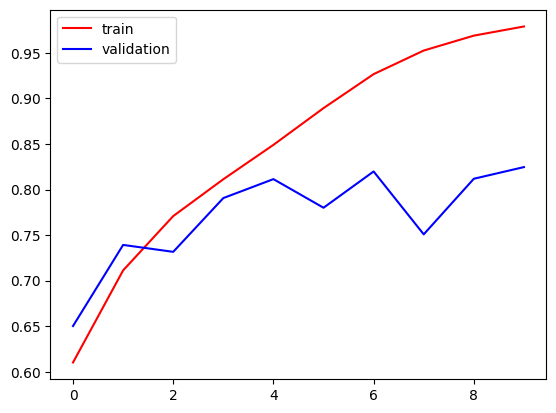

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

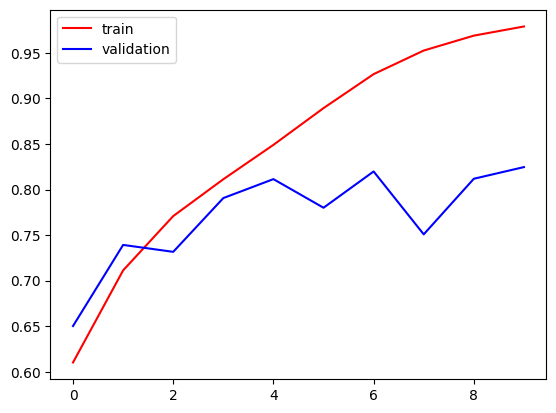

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# <font color = 'green'>**Prediction**</font>

# ****Dogs -> 1 </br> Cats -> 0****

# a. Prediction on Cat img

In [94]:
import cv2

In [95]:
test_img = cv2.imread('/content/cat.jpg')

In [96]:
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

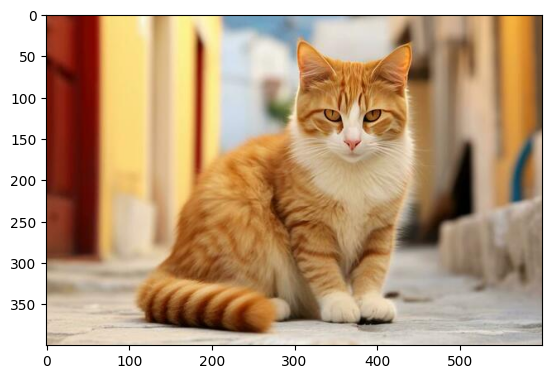

In [97]:
plt.imshow(test_img_rgb)

In [98]:
test_img_rgb.shape

(400, 600, 3)

In [99]:
test_img_rgb = cv2.resize(test_img_rgb,(256,256))

In [100]:
test_input = test_img_rgb.reshape((1,256,256,3))

In [101]:
model.predict(test_input)     # model predicted 0 which tells it's a cat!

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

# b. Prediction on Dog img

In [102]:
test_img2 = cv2.imread('/content/dog.jpg')

In [103]:
test_img_rgb2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)

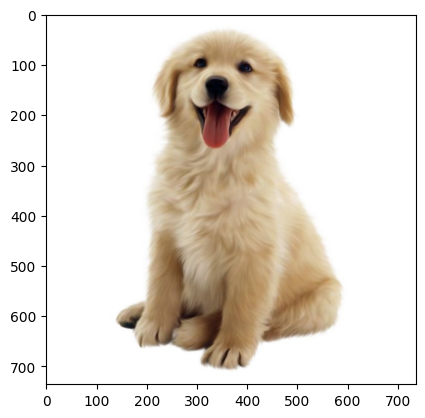

In [104]:
plt.imshow(test_img_rgb2)

In [105]:
test_img_rgb2.shape

(736, 736, 3)

In [106]:
test_img_rgb2 = cv2.resize(test_img_rgb2,(256,256))

In [107]:
test_input2 = test_img_rgb2.reshape((1,256,256,3))

In [108]:
model.predict(test_input2)     # model predicted 1 which tells it's a dog!

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)